<a href="https://colab.research.google.com/github/visionNoob/Keras_Tutorial/blob/master/Keras_1_MLP_Regression_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (선형 회귀) 시각화 데모

# 1. 라이브러리 불러오기

In [3]:
# 1.라이브러리 불러오기
import tensorflow as tf # 딥러닝 라이브러리
import keras # 딥러닝 라이브러리
import numpy as np # 수학 계산 라이브러리
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리 

#항상 버전 확인은 필수
print(tf.__version__)
print(keras.__version__)

1.15.0-rc3
2.2.5


# 2. 랜덤 시드 설정하기 (중요!)
https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

In [0]:
# 2.랜덤 시드 고정하기
import random
seed_value = 42 # 랜덤 시드 ; 삶, 우주, 그리고 모든 것에 대한 궁극적인 질문에 대한 해답.
# 
random.seed(seed_value)
np.random.seed(seed_value)
tf.set_random_seed(seed_value)

# 3. 데이터셋

In [18]:
#from keras.datasets import mnist

# 3. 데이터셋
# Train/Test Data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# train.validation split 

print("train 몇 개?_", len(x_train))
print(x_train.shape)
print(y_train.shape)
print("test 몇 개?_", len(x_test))
print(x_test.shape)
print(y_test.shape)

print(y_test[0])
y_train = keras.utils.np_utils.to_categorical(y_train) 
y_test = keras.utils.np_utils.to_categorical(y_test) 
print(y_test[0])

train 몇 개?_ 60000
(60000, 28, 28)
(60000,)
test 몇 개?_ 10000
(10000, 28, 28)
(10000,)
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# 3.1 데이터 전처리

In [0]:
x_train = (x_train) / 256
x_test = (x_test ) / 256

# 4. 모델 만들기

In [0]:
# 4.모델 만들기
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=10, activation='softmax', use_bias=False))

# 5. 모델 학습과정 설정하기

In [0]:
# 5.모델 학습과정 설정하기
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.99, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# 6. 모델 학습시키기

In [22]:
# 6.모델 학습시키기
history = model.fit(x_train, y_train, epochs=20, batch_size=1024, shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 11us/step - loss: 1.1812 - acc: 0.6523 - val_loss: 0.4775 - val_acc: 0.8566
Epoch 2/20
48000/48000 [==============================] - 0s 8us/step - loss: 0.4919 - acc: 0.8577 - val_loss: 0.4362 - val_acc: 0.8812
Epoch 3/20
48000/48000 [==============================] - 0s 8us/step - loss: 0.4791 - acc: 0.8775 - val_loss: 0.4385 - val_acc: 0.8929
Epoch 4/20
48000/48000 [==============================] - 0s 7us/step - loss: 0.4646 - acc: 0.8876 - val_loss: 0.4245 - val_acc: 0.9000
Epoch 5/20
48000/48000 [==============================] - 0s 7us/step - loss: 0.4415 - acc: 0.8950 - val_loss: 0.4059 - val_acc: 0.9035
Epoch 6/20
48000/48000 [==============================] - 0s 8us/step - loss: 0.4166 - acc: 0.9007 - val_loss: 0.3894 - val_acc: 0.9052
Epoch 7/20
48000/48000 [==============================] - 0s 8us/step - loss: 0.3928 - acc: 0.9039 - val_loss: 0.3722 - val_acc: 0.90

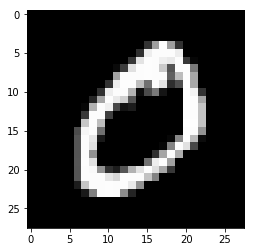

In [23]:
plt.imshow(x_train[1], 'gray')

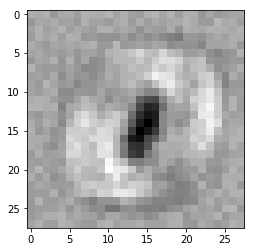

In [24]:
import matplotlib.pyplot as plt
weight = np.array(model.get_weights())
reshaped_weight = weight[0][:,0].reshape(28,28)
reshaped_weight = reshaped_weight 
output = (reshaped_weight - reshaped_weight.min()) / (reshaped_weight.max() - reshaped_weight.min())
plt.imshow(output, 'gray',)

In [0]:
output

array([[0.75041026, 0.6085841 , 0.62489647, 0.6840772 , 0.6269676 ,
        0.7251228 , 0.60278404, 0.59563404, 0.7322807 , 0.5966017 ,
        0.6392763 , 0.61098385, 0.7165326 , 0.7049026 , 0.6642822 ,
        0.61714095, 0.63328075, 0.68050224, 0.6325129 , 0.55961627,
        0.5714395 , 0.6493874 , 0.5459137 , 0.60794866, 0.5851332 ,
        0.6853326 , 0.74822867, 0.6092497 ],
       [0.63179547, 0.65607667, 0.57344687, 0.7153598 , 0.6413035 ,
        0.57968223, 0.74049693, 0.633793  , 0.5675905 , 0.6965301 ,
        0.6290151 , 0.63811207, 0.7391188 , 0.65558565, 0.61467123,
        0.5480523 , 0.7139276 , 0.6395661 , 0.6599896 , 0.5676834 ,
        0.6719818 , 0.6993814 , 0.5856249 , 0.7514713 , 0.63674223,
        0.55265164, 0.5542993 , 0.6016119 ],
       [0.5632805 , 0.701418  , 0.560626  , 0.56915635, 0.6967483 ,
        0.69250864, 0.5323092 , 0.68394434, 0.7290071 , 0.6016203 ,
        0.70376855, 0.59028286, 0.59135514, 0.49912643, 0.58260566,
        0.54277086, 0.4859

# 7.모델 평가

In [0]:
evaluation_result = model.evaluate(x_test, y_test)
print(evaluation_result)

10000/10000 [==============================] - 1s 61us/step
[2.156717554552853, 0.8617]


dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


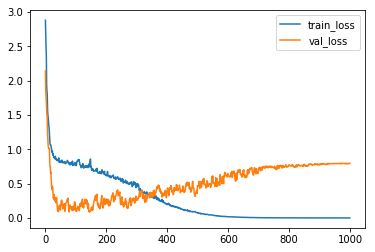

In [0]:
# Loss 출력
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(('train_loss', 'val_loss'))
plt.show()

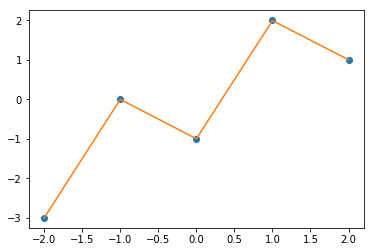

In [0]:
# 예측값 출력
yhat = model.predict(input_data)

plt.plot(input_data, output_data, 'o')
plt.plot(input_data, yhat)
plt.show()